# 📘 Учебник по регрессии для дата-аналитика
Этот ноутбук содержит **20 практических примеров регрессии**.

Для каждого примера даётся:
- Теоретическое пояснение
- Код (Python, sklearn)
- Задание для самостоятельной практики

---

## 📌 Пример 1. Простая линейная регрессия

**Теория:** Мы ищем зависимость между ценой и продажами.

Коэффициент: [-1.]
Свободный член: 6.0


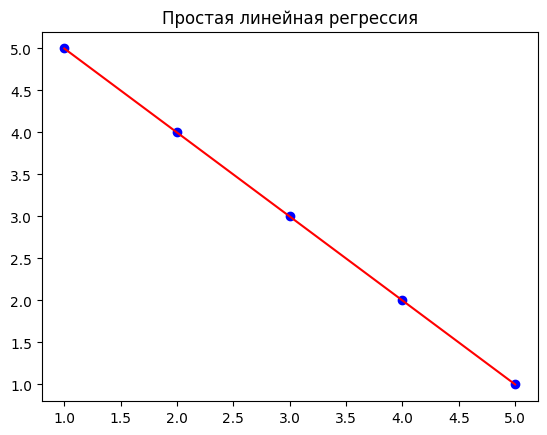

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([5, 4, 3, 2, 1])

model = LinearRegression().fit(X, y)

print("Коэффициент:", model.coef_)
print("Свободный член:", model.intercept_)

plt.scatter(X, y, color="blue")
plt.plot(X, model.predict(X), color="red")
plt.title("Простая линейная регрессия")
plt.show()

**Задание:** Измени данные так, чтобы зависимость стала положительной (прямо пропорциональной).

## 📌 Пример 2. Линейная регрессия с предсказанием

**Теория:** Модель учится находить формулу и предсказывать новые значения.

In [22]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 6, 8, 10])

model = LinearRegression().fit(X, y)
print("Предсказание для x=6:", model.predict([[6]]))

Предсказание для x=6: [12.]


**Задание:** Поменяй зависимость на `y = 3x` и проверь предсказание для x=7.

## 📌 Пример 3. Множественная линейная регрессия

**Теория:** Теперь у нас два признака, и модель ищет веса для обоих.

In [23]:
X = np.array([[1, 1], [2, 2], [3, 3], [4, 4]])
y = np.array([2, 4, 6, 8])

model = LinearRegression().fit(X, y)
print("Коэффициенты:", model.coef_)
print("Интерсепт:", model.intercept_)

Коэффициенты: [1. 1.]
Интерсепт: 1.7763568394002505e-15


**Задание:** Добавь третий признак и проверь коэффициенты.

## 📌 Пример 4. Полиномиальная регрессия

**Теория:** Используем полином 2-й степени для квадратичной зависимости.

In [24]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([1, 4, 9, 16, 25])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)
print("Коэффициенты:", model.coef_)

Коэффициенты: [ 0.00000000e+00 -8.77076189e-15  1.00000000e+00]


**Задание:** Попробуй построить кубическую (3-я степень) модель.

## 📌 Пример 5. Логистическая регрессия

**Теория:** Используется для бинарной классификации.

In [25]:
from sklearn.linear_model import LogisticRegression

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([0, 0, 0, 1, 1])

clf = LogisticRegression().fit(X, y)
print("Предсказание для x=2.5:", clf.predict([[2.5]]))

Предсказание для x=2.5: [0]


**Задание:** Смести границу: сделай, чтобы метки стали [0,0,1,1,1].

## 📌 Пример 6. Ridge-регрессия

**Теория:** Регуляризация L2 уменьшает влияние выбросов.

In [26]:
from sklearn.linear_model import Ridge

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 3, 4, 10])

ridge = Ridge(alpha=1.0).fit(X, y)
print("Коэффициент:", ridge.coef_)

Коэффициент: [1.81818182]


**Задание:** Попробуй увеличить alpha до 10 и посмотри результат.

## 📌 Пример 7. Lasso-регрессия

**Теория:** Регуляризация L1 может занулять коэффициенты.

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1).fit(X, y)
print("Коэффициент:", lasso.coef_)

Коэффициент: [1.95]


**Задание:** Попробуй alpha=1.0 и сравни результат.

## 📌 Пример 8. ElasticNet

**Теория:** Сочетает свойства Lasso и Ridge.

In [28]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X, y)
print("Коэффициент:", elastic.coef_)

Коэффициент: [1.92682927]


**Задание:** Измени l1_ratio на 0.9 и сравни результат.

## 📌 Пример 9. Регрессия с категориальными переменными

**Теория:** Категории кодируются в 0/1 для использования в регрессии.

In [29]:
import pandas as pd

df = pd.DataFrame({
    "категория": ["A", "B", "A", "B"],
    "x": [1, 2, 3, 4],
    "y": [2, 4, 6, 8]
})

df = pd.get_dummies(df, columns=["категория"], drop_first=True)
model = LinearRegression().fit(df[["x", "категория_B"]], df["y"])
print("Коэффициенты:", model.coef_)

Коэффициенты: [ 2.00000000e+00 -3.97683113e-18]


**Задание:** Добавь категорию C и снова закодируй.

## 📌 Пример 10. R² метрика

**Теория:** R² показывает долю объяснённой дисперсии.

In [30]:
from sklearn.metrics import r2_score

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
print("R²:", r2_score(y, y_pred))

R²: 1.0


**Задание:** Попробуй испортить данные шумом и сравни R².

## 📌 Пример 11. Разделение train/test

**Теория:** Обучаем модель на части данных и проверяем на другой.

In [31]:
from sklearn.model_selection import train_test_split

X = np.array([[1], [2], [3], [4], [5], [6], [7], [8]])
y = np.array([2, 4, 6, 8, 10, 12, 14, 16])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LinearRegression().fit(X_train, y_train)
print("Качество на тесте:", model.score(X_test, y_test))

Качество на тесте: 1.0


**Задание:** Сделай test_size=0.5 и сравни результаты.

## 📌 Пример 12. Кросс-валидация

**Теория:** Кросс-валидация проверяет устойчивость модели.

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X, y, cv=4)
print("Кросс-валидация (R²):", scores)

Кросс-валидация (R²): [1. 1. 1. 1.]


**Задание:** Попробуй cv=2 и сравни распределение оценок.

## 📌 Пример 13. Регрессия на датасете Diabetes

**Теория:** Реальный медицинский датасет.

In [33]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X, y = data.data, data.target

model = LinearRegression().fit(X, y)
print("R²:", model.score(X, y))

R²: 0.5177484222203499


**Задание:** Попробуй Ridge вместо LinearRegression.

## 📌 Пример 14. Дерево решений

**Теория:** Нелинейная регрессия с помощью дерева.

In [34]:
from sklearn.tree import DecisionTreeRegressor

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 4, 9, 16, 25])

tree = DecisionTreeRegressor(max_depth=2).fit(X, y)
print("Прогноз для x=6:", tree.predict([[6]]))

Прогноз для x=6: [25.]


**Задание:** Увеличь глубину дерева до 3 и проверь результат.

## 📌 Пример 15. Случайный лес

**Теория:** Объединение многих деревьев повышает точность.

In [35]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=42).fit(X, y)
print("Прогноз для x=6:", forest.predict([[6]]))

Прогноз для x=6: [21.21]


**Задание:** Попробуй n_estimators=10 и сравни результат.

## 📌 Пример 16. Градиентный бустинг

**Теория:** Бустинг улучшает модель шаг за шагом.

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor().fit(X, y)
print("Прогноз для x=6:", gbr.predict([[6]]))

Прогноз для x=6: [24.99962814]


**Задание:** Попробуй max_depth=3 и сравни результат.

## 📌 Пример 17. Регрессия с шумом

**Теория:** Даже при шуме модель находит тренд.

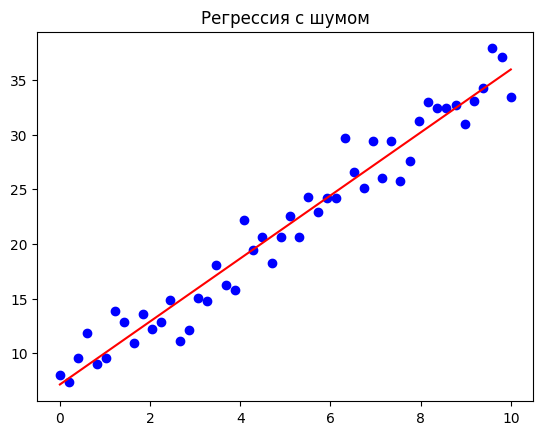

In [37]:
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 3 * X.squeeze() + 7 + np.random.randn(50) * 2

model = LinearRegression().fit(X, y)

import matplotlib.pyplot as plt
plt.scatter(X, y, color="blue")
plt.plot(X, model.predict(X), color="red")
plt.title("Регрессия с шумом")
plt.show()

**Задание:** Увеличь разброс шума и сравни график.

## 📌 Пример 18. Полиномиальная регрессия 3-й степени

**Теория:** Полином 3-й степени лучше подстраивается под данные.

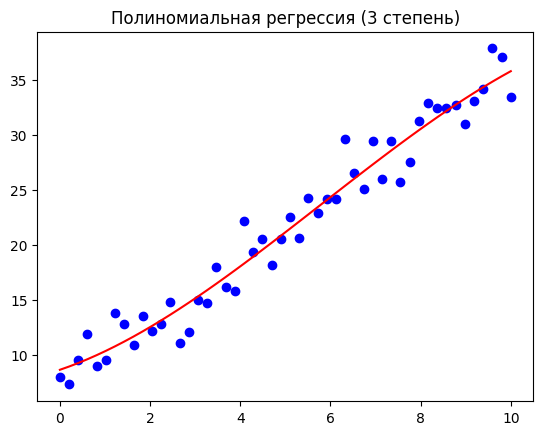

In [38]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

plt.scatter(X, y, color="blue")
plt.plot(X, model.predict(X_poly), color="red")
plt.title("Полиномиальная регрессия (3 степень)")
plt.show()

**Задание:** Попробуй степень=5 и сравни переобучение.

## 📌 Пример 19. Метрики MAE, MSE, RMSE

**Теория:** Оценка качества модели с помощью ошибок.

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_poly)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print("MAE:", mae, "MSE:", mse, "RMSE:", rmse)

MAE: 1.4173011634409454 MSE: 3.061168204807978 RMSE: 1.749619445710403


**Задание:** Попробуй модель LinearRegression без полинома и сравни метрики.

## 📌 Пример 20. Регрессия для временного ряда

**Теория:** Линейная регрессия может прогнозировать тренды.

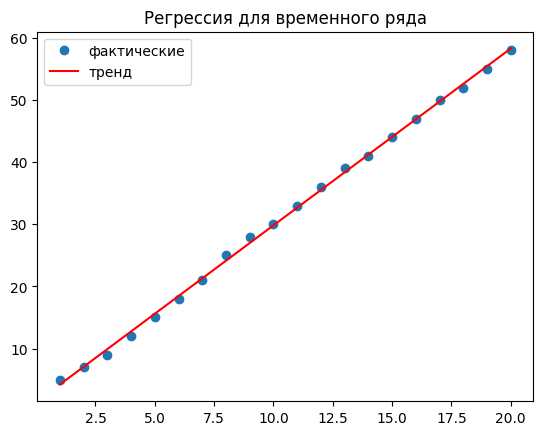

In [40]:
time = np.arange(1, 21).reshape(-1, 1)
sales = np.array([5, 7, 9, 12, 15, 18, 21, 25, 28, 30,
                  33, 36, 39, 41, 44, 47, 50, 52, 55, 58])

model = LinearRegression().fit(time, sales)

plt.plot(time, sales, "o", label="фактические")
plt.plot(time, model.predict(time), "r-", label="тренд")
plt.legend()
plt.title("Регрессия для временного ряда")
plt.show()

**Задание:** Добавь новые данные (21–25 дни) и спрогнозируй продажи.